In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [5]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [6]:
df.dropna(inplace= True)

In [7]:
len(df)

334

#### **Label Encoder**

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()

for column in df.columns:
    if df[column].dtype == "object":
        df[column] = le.fit_transform(df[column])

In [11]:
df.head(3)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,2
1,0,2,39.5,17.4,186.0,3800.0,1
2,0,2,40.3,18.0,195.0,3250.0,1


<Axes: >

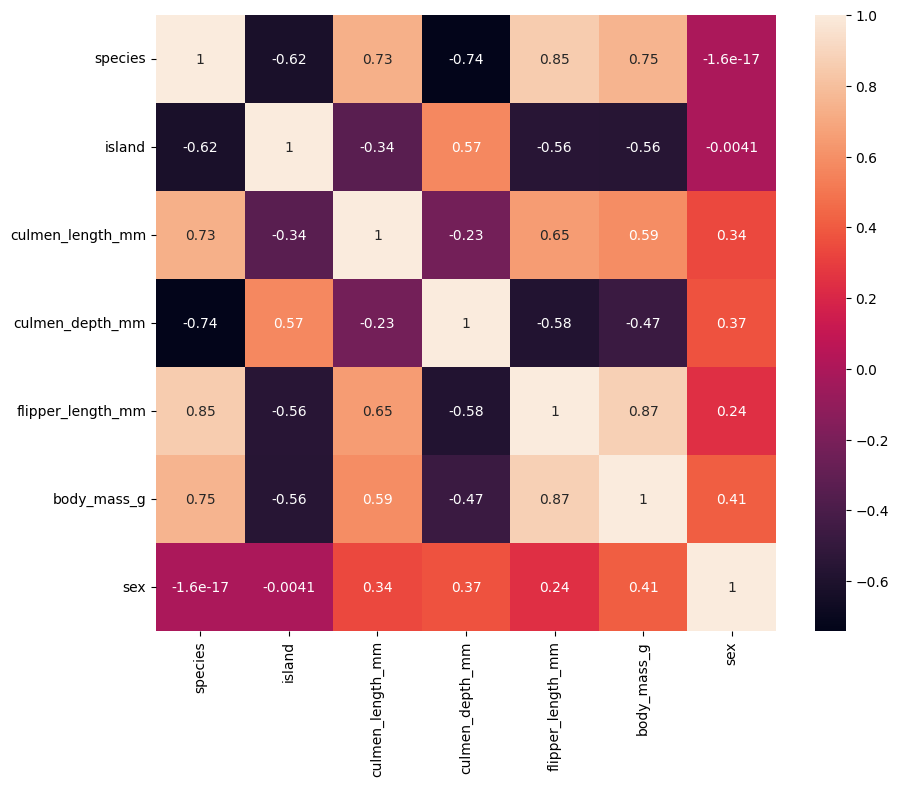

In [13]:
plt.figure(figsize= (10, 8), dpi= 100)
sns.heatmap(df.corr(), annot= True)

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

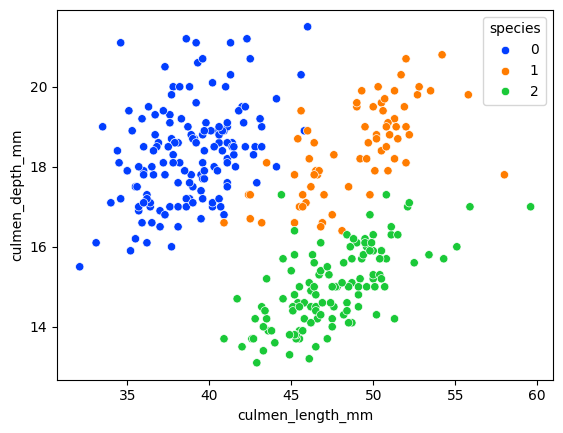

In [16]:
sns.scatterplot(x= "culmen_length_mm", y= "culmen_depth_mm", hue= "species", data=df, palette= "bright")

<Axes: xlabel='body_mass_g', ylabel='flipper_length_mm'>

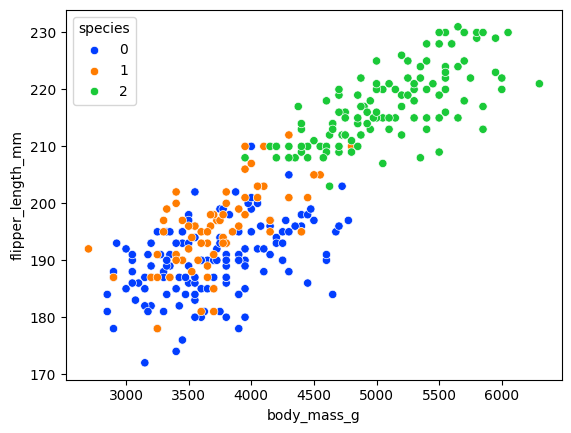

In [18]:
sns.scatterplot(x= "body_mass_g", y= "flipper_length_mm", hue= "species", data=df, palette= "bright")

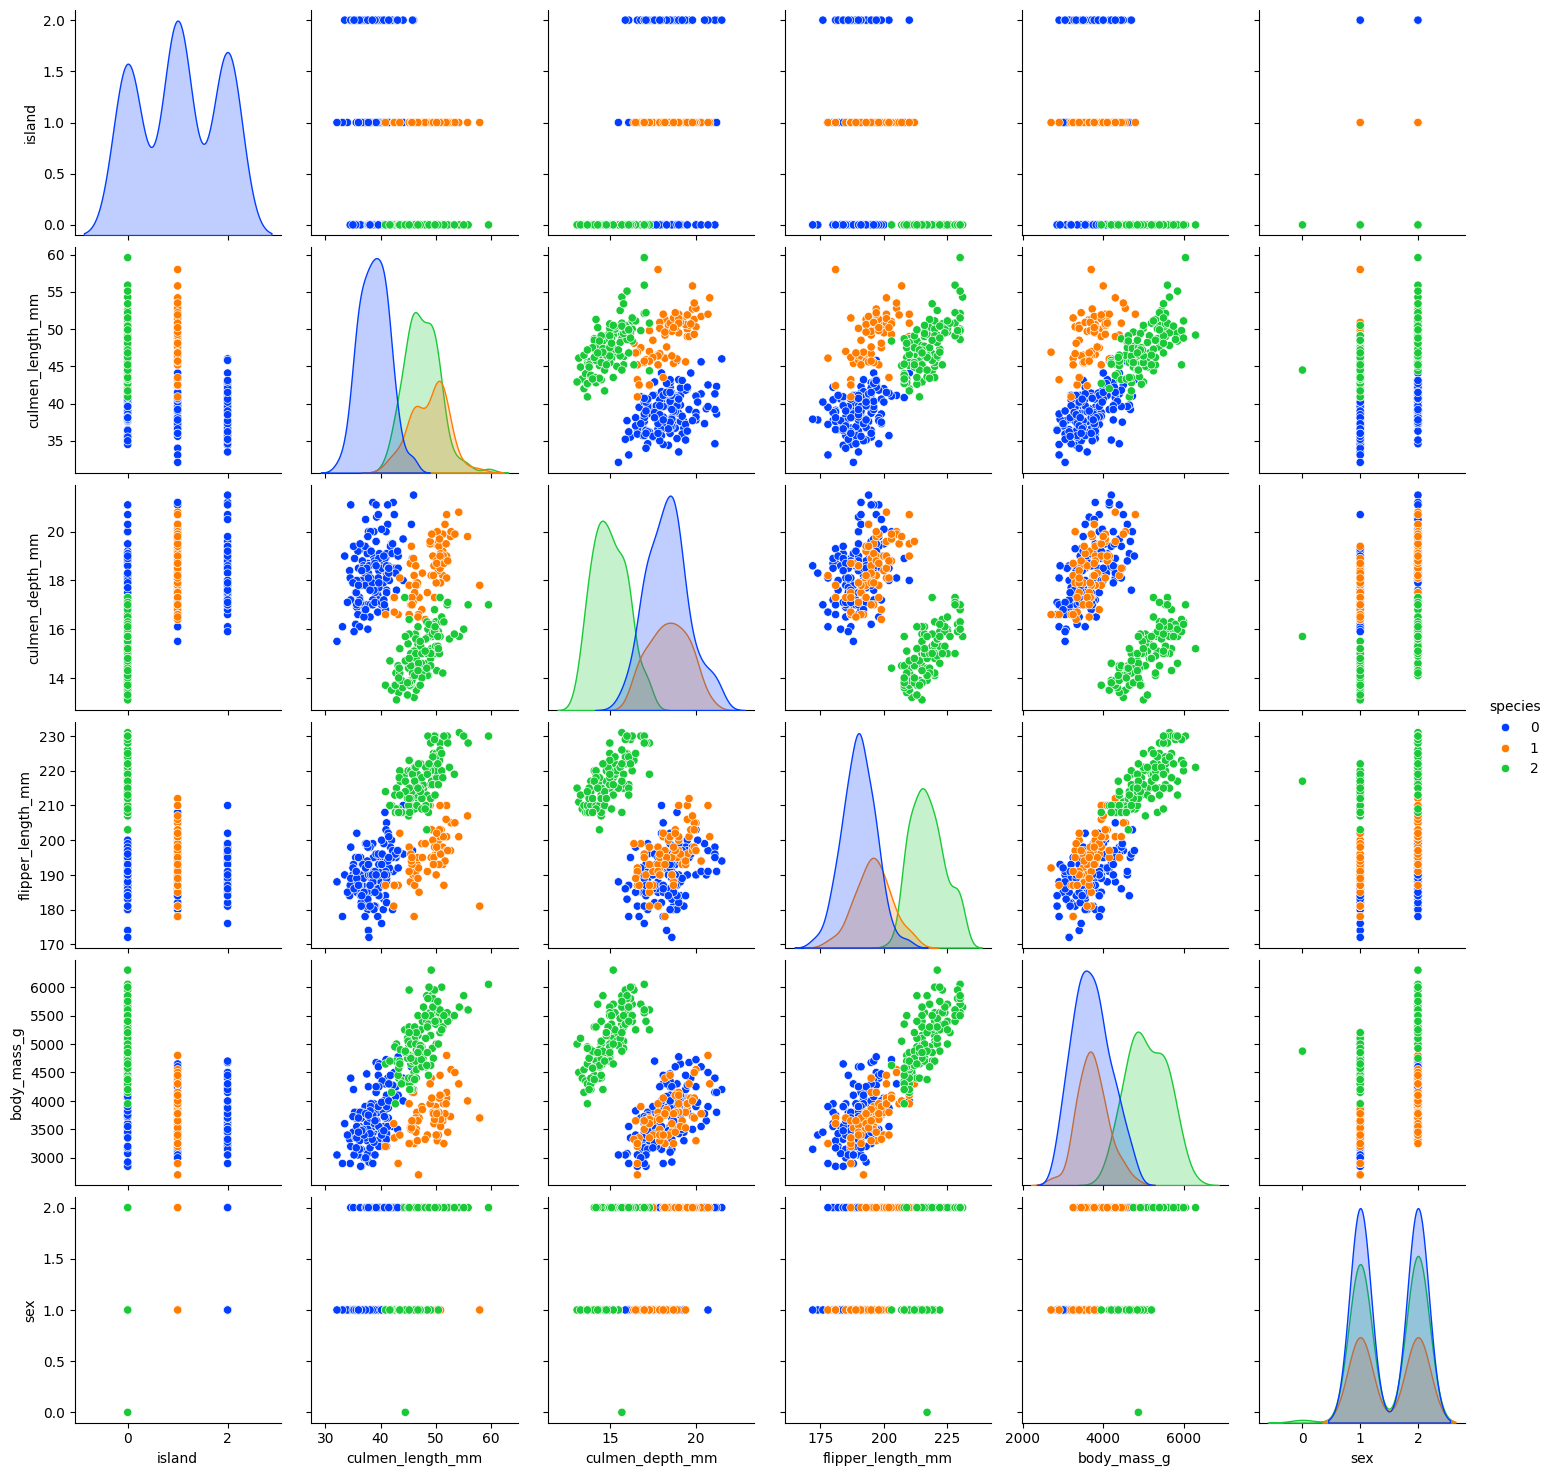

In [20]:
sns.pairplot(data=df, hue= "species", palette= "bright")

##### **X and y**

In [21]:
X = df.drop("species", axis=1)
y = df["species"]

### **Train Test Split**

In [22]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

#### **Standart Scaler**

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### **Logistic Regression**

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
log_reg = LogisticRegression()

log_reg.fit(scaled_X_train, y_train)

LogisticRegression()

In [29]:
log_pred = log_reg.predict(scaled_X_test)

##### **Metrics**

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [33]:
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        46
           1       1.00      0.96      0.98        23
           2       1.00      1.00      1.00        32

    accuracy                           0.99       101
   macro avg       0.99      0.99      0.99       101
weighted avg       0.99      0.99      0.99       101



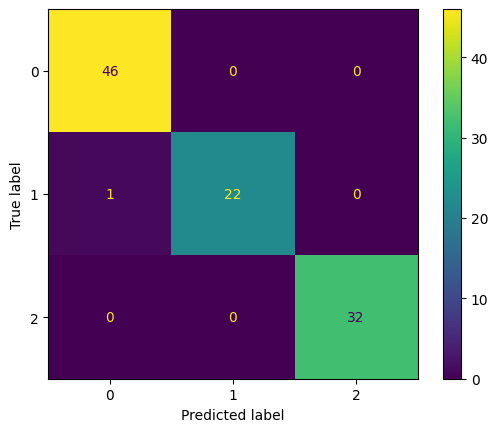

In [34]:
ConfusionMatrixDisplay.from_estimator(log_reg, scaled_X_test, y_test)

### **Decision Tree**

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
dec_tre = DecisionTreeClassifier()
dec_tre.fit(X_train, y_train)

DecisionTreeClassifier()

In [37]:
dec_pred = dec_tre.predict(X_test)

In [39]:
print(classification_report(y_test, dec_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        46
           1       0.85      1.00      0.92        23
           2       1.00      1.00      1.00        32

    accuracy                           0.96       101
   macro avg       0.95      0.97      0.96       101
weighted avg       0.97      0.96      0.96       101



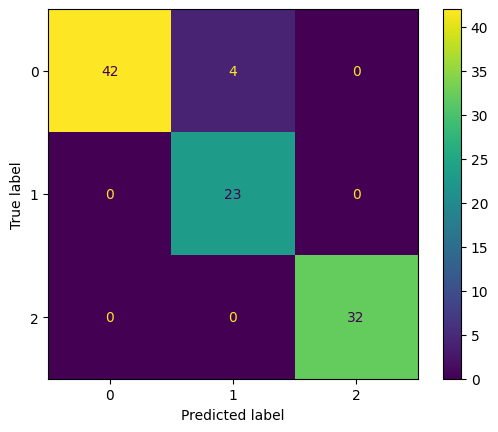

In [38]:
ConfusionMatrixDisplay.from_estimator(dec_tre, X_test, y_test)

### **Random Forest**

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [56]:
estimator_list = [50, 100, 150, 200]

for n in estimator_list:
    rand_frst = RandomForestClassifier(n_estimators= n)
    rand_frst.fit(X_train,  y_train)

    rand_pred = rand_frst.predict(X_test)
    
    acc = round(accuracy_score(y_test, rand_pred), 2)
    print(f"Number of Estimators : {n} , Accuracy Score : {acc}")

Number of Estimators : 50 , Accuracy Score : 0.96
Number of Estimators : 100 , Accuracy Score : 0.96
Number of Estimators : 150 , Accuracy Score : 0.97
Number of Estimators : 200 , Accuracy Score : 0.97


In [44]:
best_rand_reg = RandomForestClassifier(n_estimators= 50)
best_rand_reg.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [45]:
best_rand_pred = best_rand_reg.predict(X_test)

In [46]:
print(classification_report(y_test, best_rand_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        46
           1       0.92      0.96      0.94        23
           2       1.00      1.00      1.00        32

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



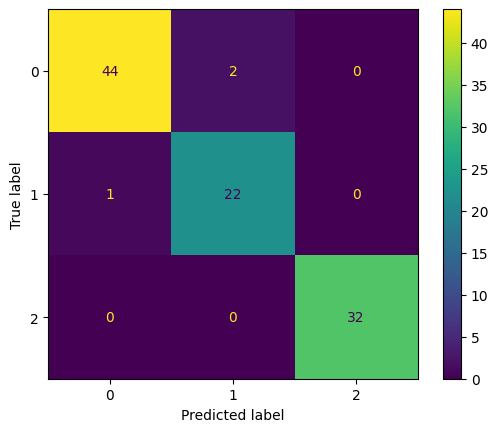

In [47]:
ConfusionMatrixDisplay.from_estimator(best_rand_reg, X_test, y_test)

### **KNN**

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
n_neighbours = [1, 3, 5, 7, 9]

for n in n_neighbours:
    knn = KNeighborsClassifier(n_neighbors= n)
    knn.fit(scaled_X_train, y_train)

    knn_pred = knn.predict(scaled_X_test)
    
    acc = round(accuracy_score(y_test, knn_pred), 2)
    print(f"Number of Estimators : {n} , Accuracy Score : {acc}")

    print(classification_report(y_test, knn_pred))
    

Number of Estimators : 1 , Accuracy Score : 0.99
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        46
           1       0.96      1.00      0.98        23
           2       1.00      1.00      1.00        32

    accuracy                           0.99       101
   macro avg       0.99      0.99      0.99       101
weighted avg       0.99      0.99      0.99       101

Number of Estimators : 3 , Accuracy Score : 0.98
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        46
           1       0.92      1.00      0.96        23
           2       1.00      1.00      1.00        32

    accuracy                           0.98       101
   macro avg       0.97      0.99      0.98       101
weighted avg       0.98      0.98      0.98       101

Number of Estimators : 5 , Accuracy Score : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00    

In [61]:
best_knn = KNeighborsClassifier(n_neighbors= 5)
best_knn.fit(scaled_X_train, y_train)

KNeighborsClassifier()

In [62]:
best_knn_pred = best_knn.predict(scaled_X_test)

In [63]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        32

    accuracy                           1.00       101
   macro avg       1.00      1.00      1.00       101
weighted avg       1.00      1.00      1.00       101



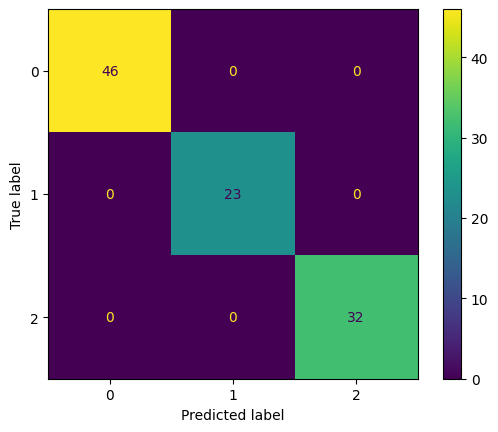

In [64]:
ConfusionMatrixDisplay.from_estimator(best_knn, scaled_X_test, y_test)

### **Best Model**

In [75]:
print("Logistic Regression")
print(classification_report(y_test, log_pred))

print("Decision Tree Classifier")
print(classification_report(y_test, dec_pred))

print("Random Forest Classifier")
print(classification_report(y_test, best_rand_pred))

print("KNN")
print(classification_report(y_test, knn_pred))

Logistic Regression
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        46
           1       1.00      0.96      0.98        23
           2       1.00      1.00      1.00        32

    accuracy                           0.99       101
   macro avg       0.99      0.99      0.99       101
weighted avg       0.99      0.99      0.99       101

Decision Tree Classifier
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        46
           1       0.85      1.00      0.92        23
           2       1.00      1.00      1.00        32

    accuracy                           0.96       101
   macro avg       0.95      0.97      0.96       101
weighted avg       0.97      0.96      0.96       101

Random Forest Classifier
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        46
           1       0.92      0.96      0.94        23
     

In [ ]:
### KNN - Logistic Regression - Random Forest - Decision Tree

In [ ]:
# Best Model : KNN

In [ ]:
# Predict Samples

In [86]:
df.iloc[212:216]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
218,1,1,50.8,19.0,210.0,4100.0,2
219,1,1,50.2,18.7,198.0,3775.0,1
220,2,0,46.1,13.2,211.0,4500.0,1
221,2,0,50.0,16.3,230.0,5700.0,2


In [87]:
# index 218
pengu_1 = [[1, 50.8, 19, 210, 4100, 2]]
scaled_pengu_1 = scaler.transform(pengu_1)

knn.predict(scaled_pengu_1)

C:\Users\himme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])

In [88]:
# index 220
pengu_2 = [[0, 46.1, 13.2, 211, 4500, 1]]
scaled_pengu_2 = scaler.transform(pengu_2)

knn.predict(scaled_pengu_2)

C:\Users\himme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([2])

In [104]:
pengu_3 = [[0, 39, 17.5, 185, 3550, 1]]
scaled_pengu_3 = scaler.transform(pengu_3)

knn.predict(scaled_pengu_3)

C:\Users\himme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])

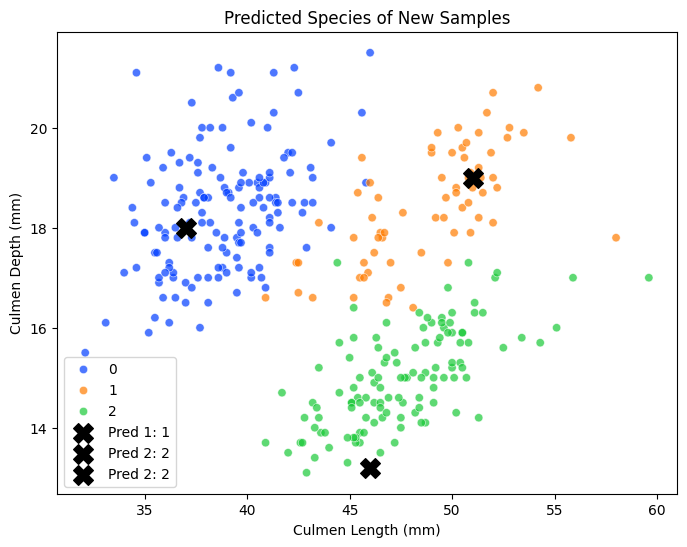

In [108]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["culmen_length_mm"], y=df["culmen_depth_mm"], hue=df["species"], palette="bright", alpha=0.7)

# Add the predicted points from the model
pred_1_class = knn.predict(scaled_pengu_1)[0]
pred_2_class = knn.predict(scaled_pengu_2)[0]
pred_3_class = knn.predict(scaled_pengu_3)[0]

plt.scatter(51, 19, color="black", label=f"Pred 1: {pred_1_class}", marker="X", s=200)
plt.scatter(46, 13.2, color="black", label=f"Pred 2: {pred_2_class}", marker="X", s=200)
plt.scatter(37, 18, color="black", label=f"Pred 2: {pred_2_class}", marker="X", s=200)

plt.legend()
plt.xlabel("Culmen Length (mm)")
plt.ylabel("Culmen Depth (mm)")
plt.title("Predicted Species of New Samples")
plt.show()
